In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle as w
import explore as e
import model as m

from scipy.stats import ttest_1samp
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import Holt

%matplotlib inline


# Goal:

Use data from 1923-01-01 to 2013-09-01 of average monthly temperatures to forecast the next 12 months' average temps in New York city.

Date range of predicitions:
2013-10-01 to 2014-10-01

In [2]:
#Acquiring and Prepping Data
df = w.wrangle_new_york()

#splitting data
train, val, test = w.split_new_york(df)


# Explore

<AxesSubplot:title={'center':'Monthly Average Temp Increases Over Time'}, xlabel='date'>

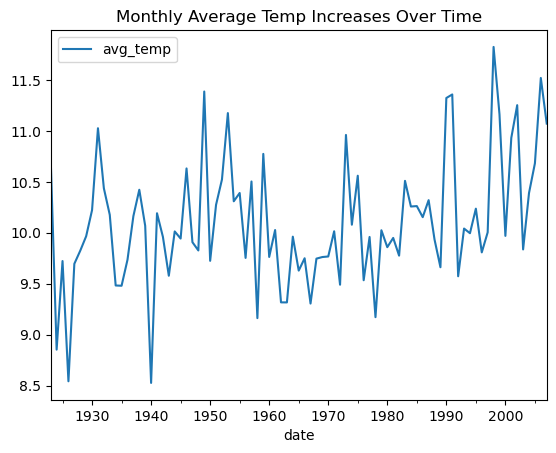

In [3]:
# plotting monthly average temp
train.resample('Y').mean().plot(title= 'Monthly Average Temp Increases Over Time')

# Model #1: Moving Average Model

In [4]:
#making predictions with moving/rolling average model
yhat_df = m.rolling_avg_model(train, val)
print(f'Average temp per month for the next year:  {yhat_df.iloc[1]}')

Average temp per month for the next year:  avg_temp    10.4364
Name: 2007-10-01 00:00:00, dtype: float64


In [5]:
#calculation Root Mean Squared Error
rmse = round(sqrt(mean_squared_error(val['avg_temp'], yhat_df['avg_temp'])), 2)
print(f'Root Mean Squared Error is: {rmse}')

Root Mean Squared Error is: 9.07


# Model #2: Basic Holt's Linear Trend

In [6]:
#creating Holt object, fitting the model, making predictions

for col in train.columns:
    model = Holt(train[col], exponential = False)
    model = model.fit(smoothing_level = .1, 
                      smoothing_slope = .1, 
                      optimized = False)
    yhat_items = model.predict(start = val.index[0], 
                               end = val.index[-1])
    yhat_df[col] = round(yhat_items, 2)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/4f/nyhvlyfd511911zdvn0fq0_00000gn/T/ipykernel_51803/916958566.py:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = model.fit(smoothing_level = .1,


#### Plot average temperatures in the given data set.
#### Blue is the train set, orange is the validate set, green is the test set.

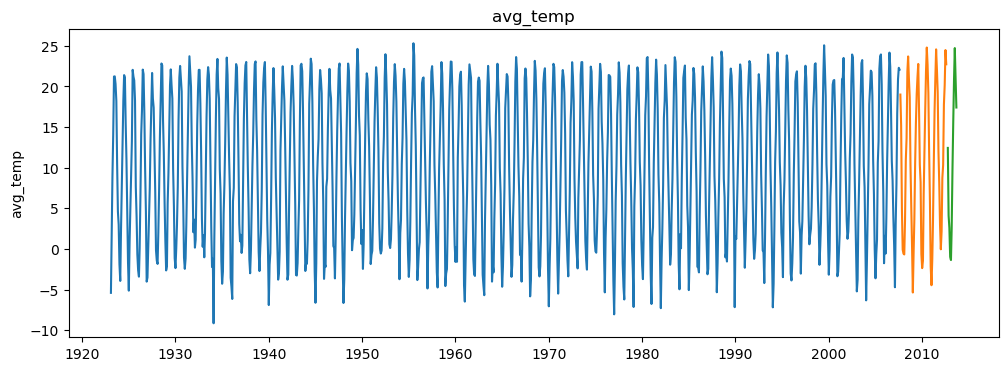

In [7]:
#calling function to plot the given average temps
m.plot_all_target_sets(train, val, test)

#### Plot predictions and calculate RMSE

avg_temp -- RMSE: 11.3302


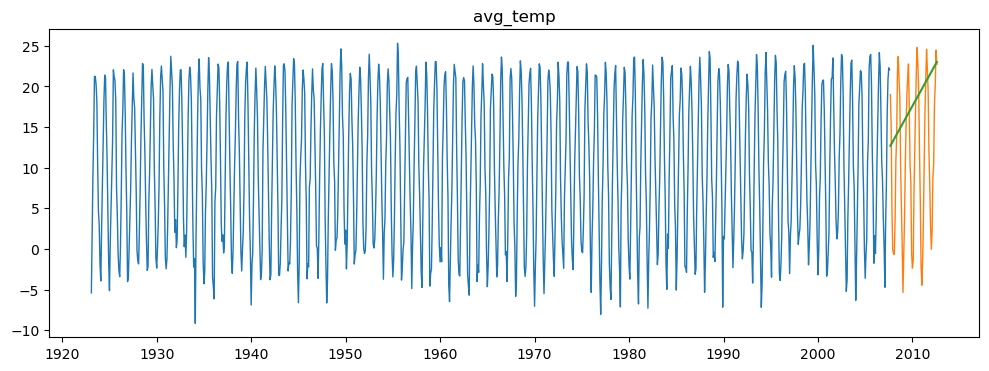

In [8]:
#calling function to plot and calculation
m.plot_and_eval(train, val, test, yhat_df, 'avg_temp')

# Next steps


